### Ignore Warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Import Needed Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.metrics import mean_squared_error, r2_score

Using TensorFlow backend.


### Prepare Our Data

In [3]:
# preparing independent and dependent features
def prepare_data(data, n_features):
    X, y =[],[]
    for i in range(len(data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

### Prepare & Split our Data

In [4]:
# define input sequence
data = pd.read_csv('NewDataEntire.csv', index_col=[0])
train = data[ : int(len(data) * .8)]
valid = data[int(len(data) * .8) : ]
# choose a number of time steps
n_steps = 60
# split into samples
X_train, y_train = prepare_data(train.values, n_steps)
X_test, y_test = prepare_data(valid.values, n_steps)

### Test the shape

In [5]:
X_train.shape , X_test.shape

((752262, 60, 1), (188021, 60, 1))

In [6]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

### Test the shape again!!!

In [7]:
X_train.shape , X_test.shape

((752262, 60, 1), (188021, 60, 1))

### Building LSTM Model

In [8]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train, y_train, epochs=3, verbose=1)


Epoch 1/3
752262/752262 [==============================] - 1259s 2ms/step - loss: 4.5186e-04
Epoch 2/3
752262/752262 [==============================] - 1294s 2ms/step - loss: 6.6228e-06
Epoch 3/3
752262/752262 [==============================] - 1370s 2ms/step - loss: 4.3277e-06


In [9]:
# Save The Data & the model

# X_train.to_csv('X_train.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)
model.save("my_model_3")

### Evaluating the Model

In [10]:
score_train = model.evaluate(X_train, y_train, verbose=1)
score_test = model.evaluate(X_test, y_test, verbose=1)
score_train, score_test

188021/188021 [==============================] - 113s 603us/step


(4.632196629969895e-06, 9.730239962550139e-06)

In [11]:
y_train_pred = model.predict(X_train, verbose=0)
y_test_pred = model.predict(X_test, verbose=0)

In [12]:
mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test,y_test_pred)

(4.632198511904012e-06, 9.730241707862874e-06)

In [13]:
r2_score(y_train,y_train_pred), r2_score(y_test,y_test_pred)

(0.9994496631978541, 0.9993754872201206)

### Plotting Predictions vs Real Data

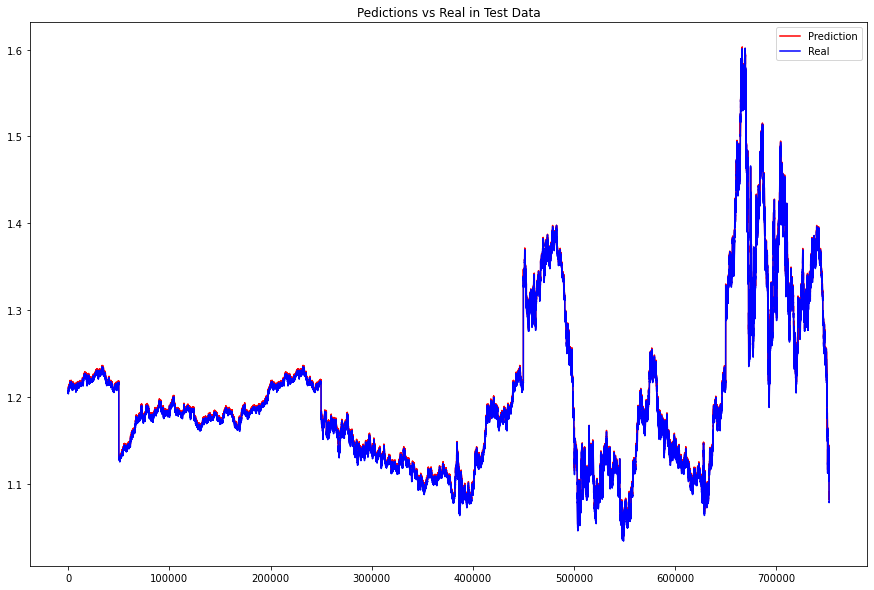

In [16]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_train_pred)),y_train_pred, '-r', label="Prediction")
plt.plot(range(len(y_train)),y_train, '-b', label="Real")
plt.legend(loc="upper right")
plt.title('Pedictions vs Real in Test Data')
plt.show()

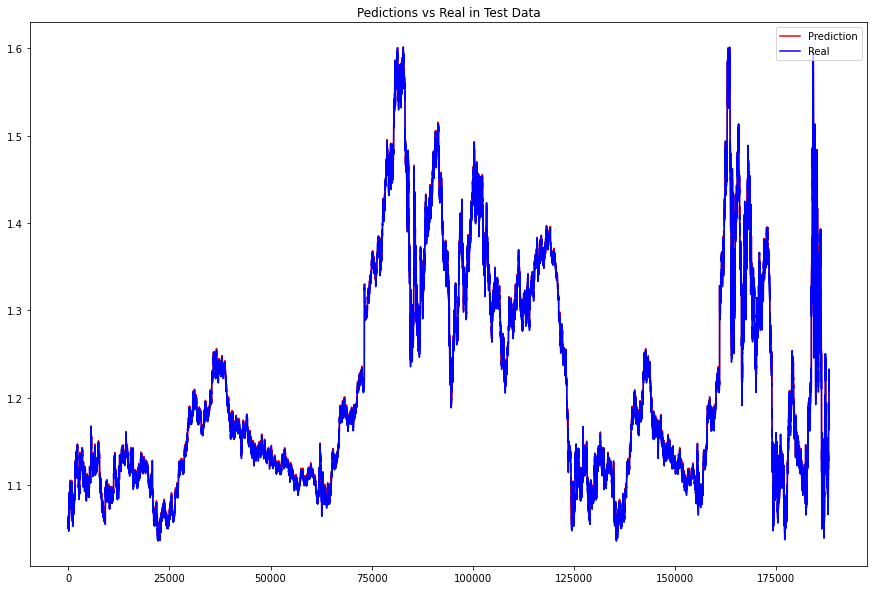

In [17]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test_pred)),y_test_pred, '-r', label="Prediction")
plt.plot(range(len(y_test)),y_test, '-b', label="Real")
plt.legend(loc="upper right")
plt.title('Pedictions vs Real in Test Data')
plt.show()